In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from matplotlib import pyplot
from random import randint

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train

image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


x_train shape: (60000, 784)
60000 train samples
10000 test samples


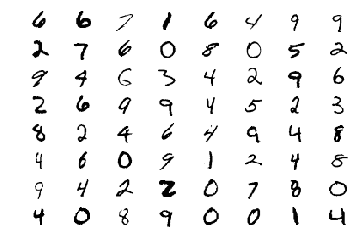

In [0]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

for i in range(64):
    ax = pyplot.subplot(8, 8, i+1)
    ax.axis('off')
    pyplot.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

In [0]:
def build_model(layers = 1, layer_sizes=[256] * 1, batch_size=128, epochs=15,
                activation_fn='sigmoid', optimiser_fn='sgd',
                add_dropout=False, dropout_p=0.2, l2_reg=0.0):
    model = Sequential()
    # range(a, b) is exclusive of b
    for l in range(0, layers):
        if (l == 0):
            model.add(Dense(layer_sizes[l], kernel_regularizer=l2(l2_reg), activation=activation_fn, input_shape=(image_size,)))
        else:
            model.add(Dense(layer_sizes[l], kernel_regularizer=l2(l2_reg), activation=activation_fn))
        if add_dropout:
            model.add(Dropout(dropout_p))

    model.add(Dense(units=num_classes, activation='softmax'))
    
    model.summary()
    model.compile(optimizer=optimiser_fn, loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                        verbose=True, validation_split=0.1)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    return history, loss, accuracy

W0819 18:56:30.537057 140640190072704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 18:56:30.580307 140640190072704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 18:56:30.588833 140640190072704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 18:56:30.619225 140640190072704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0819 18:56:30.642911 140640190072704 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 5s 91us/step - loss: 0.8800 - acc: 0.7732 - val_loss: 0.4552 - val_acc: 0.9022
Epoch 2/5
54000/54000 [==============================] - 1s 24us/step - loss: 0.4478 - acc: 0.8890 - val_loss: 0.3325 - val_acc: 0.9240
Epoch 3/5
54000/54000 [==============================] - 1s 24us/step - loss: 0.3612 - acc: 0.9053 - val_loss: 0.2857 - val_acc: 0.9292
Epoch 4/5
54000/54000 [==============================] - 1s 23us/step - los

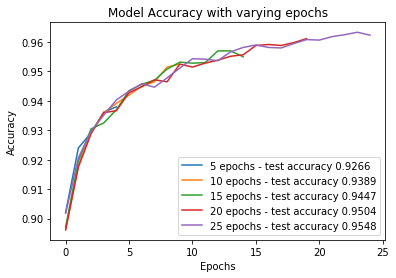

In [0]:
# Test number of epochs
legend = []
pyplot.close()
for epoch_count in range(5, 30, 5):
    history, loss, accuracy = build_model(epochs=epoch_count) 
    pyplPerceptronPerceptronot.plot(history.history['val_acc'])
    legend.append('{} epochs - test accuracy {}'.format(epoch_count, accuracy))

pyplot.title('Model Accuracy with varying epochs')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 2s 28us/step - loss: 1.3648 - acc: 0.6563 - val_loss: 0.9392 - val_acc: 0.8285
Epoch 2/15
54000/54000 [==============================] - 1s 23us/step - loss: 0.8625 - acc: 0.8234 - val_loss: 0.6938 - val_acc: 0.8767
Epoch 3/15
54000/54000 [==============================] - 1s 23us/step - loss: 0.6918 - acc: 0.8531 - val_loss: 0.5739 - val_acc: 0.8900
Epoch 4/15
54000/54000 [==============================] - 1s 23us/step - l

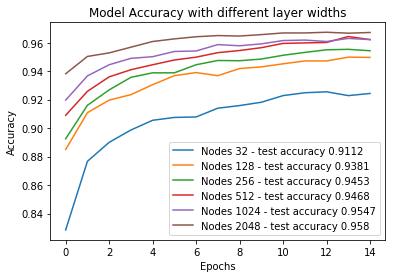

In [0]:
# Test different layer widths
legend.clear()
pyplot.close()
for nodes in [32, 128, 256, 512, 1024, 2048]:
    history, loss, accuracy = build_model(1, [nodes]) 
    pyplot.plot(history.history['val_acc'])
    legend.append('Nodes {} - test accuracy {}'.format(nodes, accuracy))
    print('Nodes {} - test accuracy {}'.format(nodes, accuracy))

    pyplot.title('Model Accuracy with different layer widths')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()

W0820 13:13:07.881282 139932195551104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 13:13:08.046288 139932195551104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 13:13:08.052618 139932195551104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0820 13:13:08.082984 139932195551104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0820 13:13:08.108730 139932195551104 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 5s 90us/step - loss: 0.8932 - acc: 0.7663 - val_loss: 0.4531 - val_acc: 0.9000
Epoch 2/15
54000/54000 [==============================] - 1s 23us/step - loss: 0.4486 - acc: 0.8857 - val_loss: 0.3332 - val_acc: 0.9185
Epoch 3/15
54000/54000 [==============================] - 1s 23us/step - loss: 0.3621 - acc: 0.9048 - val_loss: 0.2865 - val_acc: 0.9278
Epoch 4/15
54000/54000 [==============================] - 1s 23us/step -

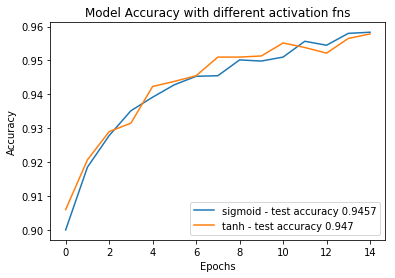

In [0]:
# Test different activation fn in hidden layer(s)
legend = []
pyplot.close()
for fn in ['sigmoid', 'tanh']:
    history, loss, accuracy = build_model(activation_fn=fn) 
    pyplot.plot(history.history['val_acc'])
    legend.append('{} - test accuracy {}'.format(fn, accuracy))

pyplot.title('Model Accuracy with different activation fns')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 1s 27us/step - loss: 0.9030 - acc: 0.7692 - val_loss: 0.4591 - val_acc: 0.8967
Epoch 2/15
54000/54000 [==============================] - 1s 23us/step - loss: 0.4532 - acc: 0.8856 - val_loss: 0.3407 - val_acc: 0.9158
Epoch 3/15
54000/54000 [==============================] - 1s 23us/step - loss: 0.3669 - acc: 0.9044 - val_loss: 0.2862 - val_acc: 0.9308
Epoch 4/15
54000/54000 [==============================] - 1s 23us/step -

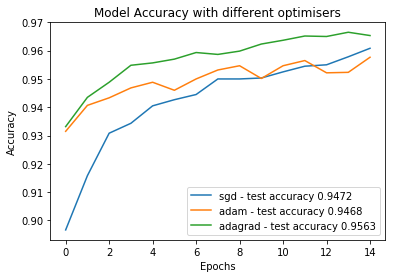

In [0]:
# Test different optimisation functions
legend = []
pyplot.close()
for fn in ['sgd', 'adam', 'adagrad']:
    history, loss, accuracy = build_model(optimiser_fn=fn) 
    pyplot.plot(history.history['val_acc'])
    legend.append('{} - test accuracy {}'.format(fn, accuracy))

pyplot.title('Model Accuracy with different optimisers')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()